In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib.ticker import MultipleLocator

In [17]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")

def ConvertStringToInt(df):
  columns_to_encode = list(df.select_dtypes(include=['category','object'])) #gets all columns with non-numeric values
  le = LabelEncoder()
  for feature in columns_to_encode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df


In [18]:
training_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [19]:
training_data = ConvertStringToInt(training_data)
training_data = training_data.replace({np.NaN:0})

# Matrix

<AxesSubplot:>

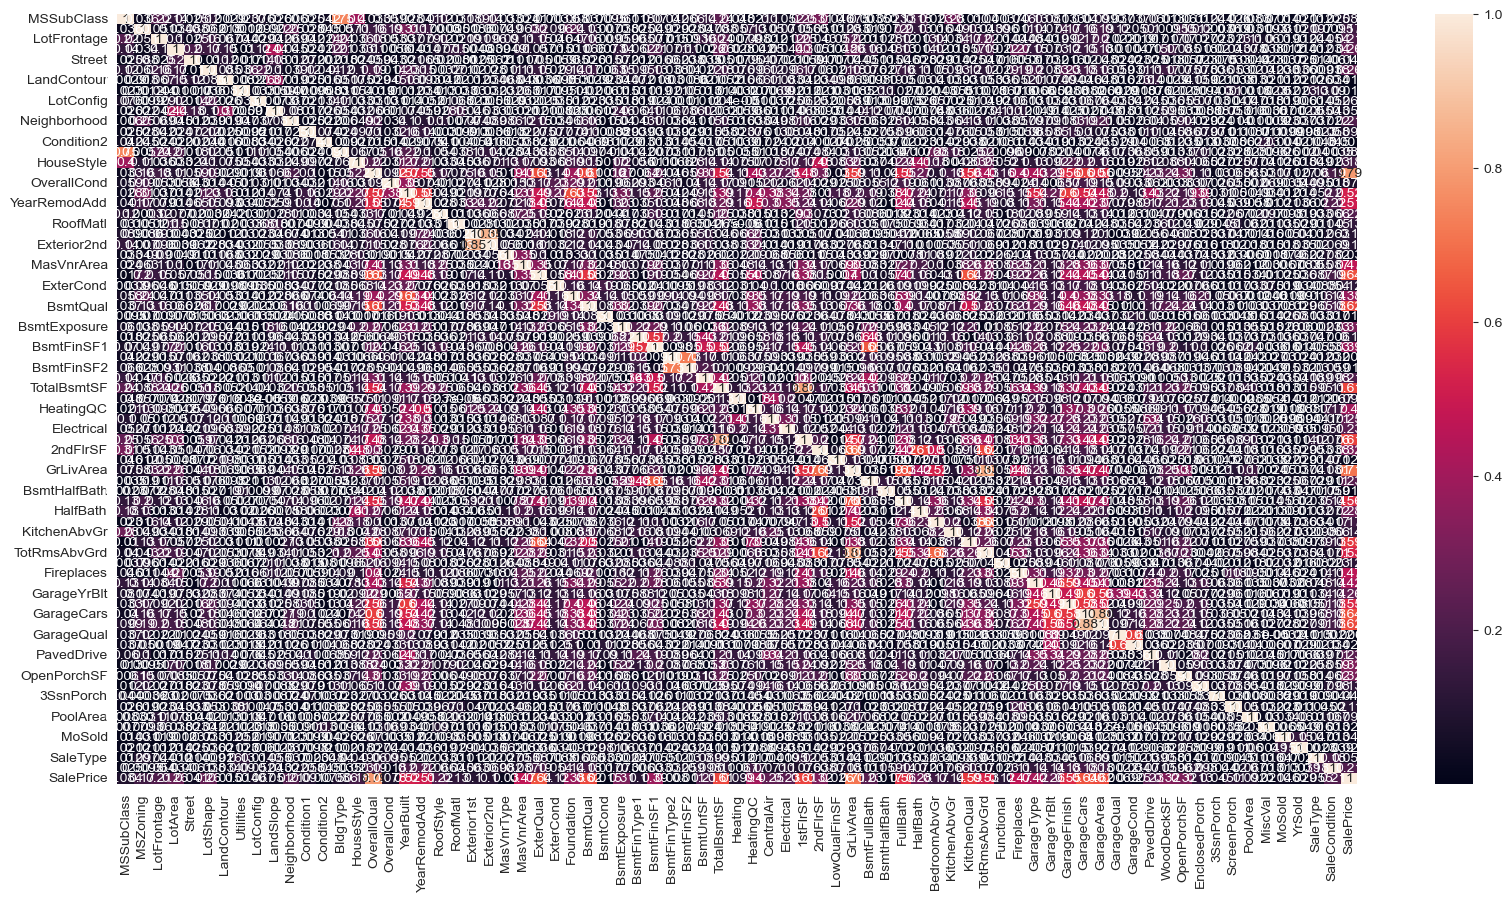

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(training_data.corr().abs(),  annot=True)

In [21]:
matrix = training_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0.6
rows_to_keep = matrix.iloc[:, -1]>=0.6
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix.shape

(9, 9)

<AxesSubplot:>

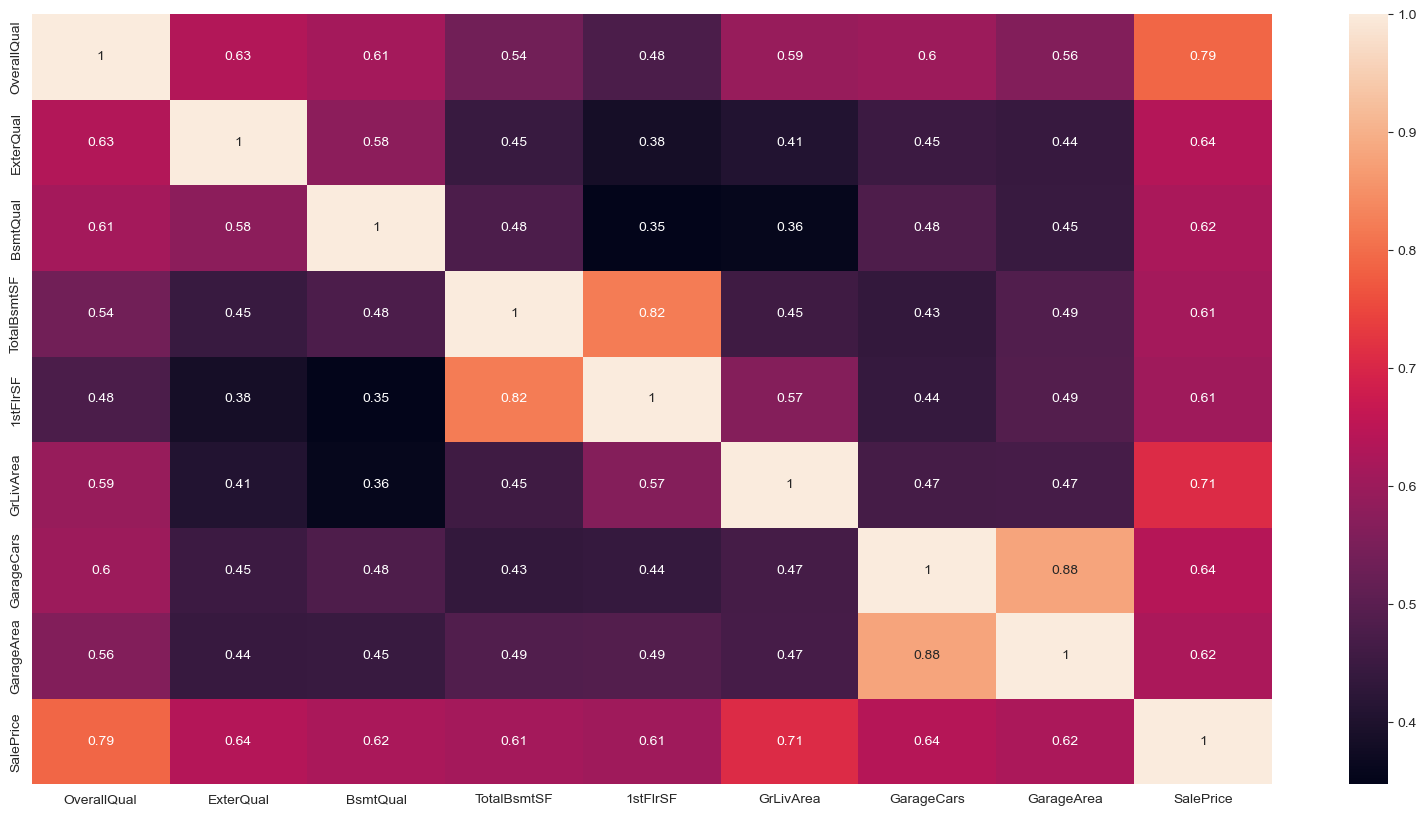

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)

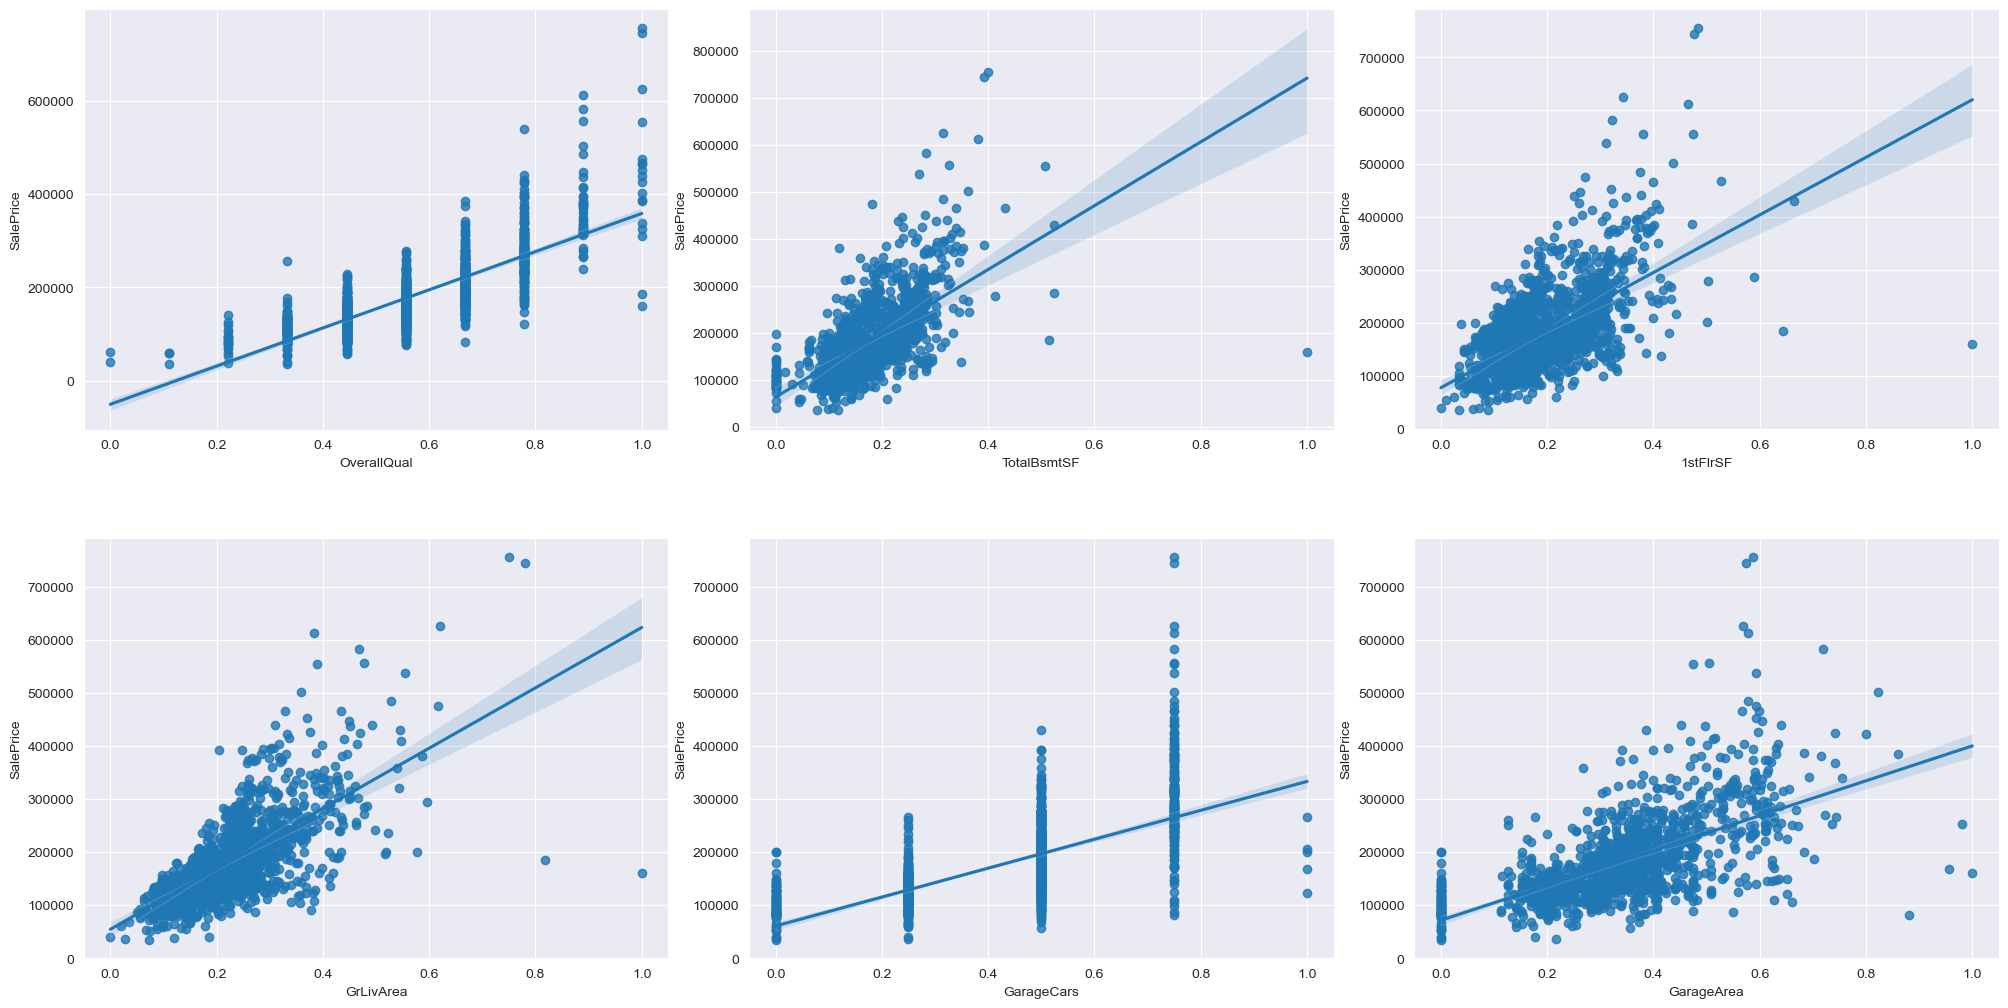

In [23]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = training_data.loc[:,column_sels]
y = training_data['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)